# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 3

__Nombres de los estudiantes: Ana Belén Duarte León & Mª de los Ángeles Plaza Gutiérrez

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv("countries_of_the_world.csv", index_col=0)
df = df.drop(['Region'], axis=1)
df = df.dropna()
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393


## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [4]:
column_names = ['GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Agriculture', 'Industry' , 'Service']

df1 = df.loc[ :, column_names]
df1

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
Country,,,,,,
Afghanistan,700.0,36.0,3.2,0.380,0.240,0.380
Albania,4500.0,86.5,71.2,0.232,0.188,0.579
Algeria,6000.0,70.0,78.1,0.101,0.600,0.298
Anguilla,8600.0,95.0,460.0,0.040,0.180,0.780
Antigua & Barbuda,11000.0,89.0,549.9,0.038,0.220,0.743
...,...,...,...,...,...,...
Venezuela,4800.0,93.4,140.1,0.040,0.419,0.541
Vietnam,2500.0,90.3,187.7,0.209,0.410,0.381
Yemen,800.0,50.2,37.2,0.135,0.472,0.393


### VARIABLES:
Estas variables representan datos de nuestros distintos países: PIB, % de la gente que sabe leer y escribir, teléfonos por cada 1000 habitantes y la distribucaión del trabajo en los tres sectores: agricultura, industria y servicios.

In [5]:
df1.describe()



,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


Podemos observar que existen 179 millones de datos. 
Std es la desviación típica, y nos ofrece información sobre qué tan dispersos están los datos alrededor de la media. 
### PIB;
Observamos que los valores se encuentran muy dispersos respecto a la media, más de 9000 de dispersión. Además existe una diferencia significante entre el meor PIB, 500, y el mayor que es de 37.800. En cuanto a 25%, 50% y 75%, describen la distribución de los datos: 50 debe ser un valor que describa la mediana. 25, 75 es el borde del cuartil superior / inferior de los datos. Por tanto la mediana es 5100, que está más próximo al valor mínimo que al máximo, es decir, debe haber muchos valores que son muy pequeños. El cuartil superior sigue quedando lejos del valor máximo, por tanto hay grandes saltos entre los valores máximos, y saltos más pequeños entre los valores mínimos, como vemos en el cuartil inferior que está más o menos en el medio entre el valor mínimo y la mediana.

### Personas que saben leer y escribir:
En este caso, los valores también se encuentran dispersos respecto a la media, aunque en menor medida. Como se trata de un porcentaje, los valores van del 0 al 100, y observamos que la diferencia entre el valor mínimo y mñaximo es significativa, y además existe algún país en el que el 100% de sus habitantes saben leer y escribir. Por otro lado, la media refleja que más de un 80% del total de habitantes de todos los países sí saben, y la mediana de los valores, 90, nos muestra por tanto que que existen muchos países con valores muy altos, ya que los valores van del 0 al 100 y el del medio es 90. Esto también se refleja en el cuartil superior (muy alto) e inferior (también muy alto, por encima de 50).

### Teléfonos por cada 1000 habitantes:
En cuanto a este dato, la media es de 208, es decir, menos de 1 teléfono por cada 4 habitantes, lo cual parece sorprendente comparándolo por ejemplo con un país como España donde muchas personas llegan a tener incluso dos teléfonos. De hecho, el valor mínimo es de 0.2 de cada 1000 habitantes que comparado con los 898 máximos, es una gran diferencia, casi del 100%. Por último al mirar la desviación típica, esta corrobora lo anterior, en promedio la desviación de la media es de 200. Además la mediana es 137, un valor muy pequeño, y el primer cuartil mucho menor. Los datos tienden a acumularse en valores bajos.

### Agricultura, Industria y Servicios:
Hablamos de estos datos a la vez pues están muy relacionados. Observamos que entre ellos las medias suman prácticamente 100, pues representan la división del trabajo en los distintos ámbitos. Por otra parte, las desviaciones típicas son muy bajas, los datos apenas se desvían de la media en los tres casos. Los valores mínimos también son casi nulos, de hecho llega a ser nulo en el caso de la agricultura, y los valores máximos casi llegan al 100% excepto en la agricultira, que es algo superior al 75%. Es decir, existen países dedicados enteramente a cada una de esas categorías y otros en los que apenas existen. 

La mediana de los valores si que difiere: mientras en la agricultuta es muy baja, lo que refleja que existen muchos países que se dedican muy poco a la agricultura, y lo mismo con la industria, en el caso de los servicios el valor está justo en el medio, por lo tanto están distribuidos de manera más equitativa. Lo mismo reflejan los cuartiles.

### Relaciones entre los pares de variables: 
Podemos observar que los datos más relacionados son el PIB con el nº de teléfonos, lo que tiene sentido ya que a mayor riqueza en el país, mayor capacidad de adquisición de teléfono.

Como sabemos, si el PIB y los teléfonos crecen a la vez, actúan casi como si fuesen la misma variable, por lo que no nos aporta mucho tener a ambas, como observamos los gráficos que relacionan los teléfonos con otra variable y el PIB con esa misma variable son casi idénticos.

Es clara la relación entre el PIB y la capacidad de leer y escribir. Cuanto más pobre sea el país, menos personas pueden aceder a esta educación. 

Por lo dicho anteriormente, el gráfico que relaciona poder leer y escribir con el PIB es casi el mismo que lo relaciona con tener teléfono, si las personas no tienen acceso a educación, es más probable que no tengan teléfono, y en general que el PIB del país sea pequeño.

Lo mismo ocurre 

Asimismo, la relación entre las tres categorías de trabajo es obvia, si uno de estos valores crece el resto decrecerá, pues en su conjunto conforman el 100% del trabajo del país. Por ello las 6 gráficas relacionadas con estos 3 valores tienen el mismo aspecto.

Por otra parte, la relación del PIB con estas 3 actividades es clara: a menor riqueza, crece casi exponencialmente la agricultura, mientras que si la riqueza crece, también lo hace el sector servicios y la industria, aunque estas últimas algo más disgregadas.

Por ello la relación de las actividades de trabajo con los teléfonos será extremadamente similar a la que tienen con el PIB. 
 
Por último, las actividades están relacionadas con la capacidad de leer y excribir de manera bastante irregular, en los tres casos los valores tienden a apelotonarse a medida que crece la capacidad para leer y escribir.


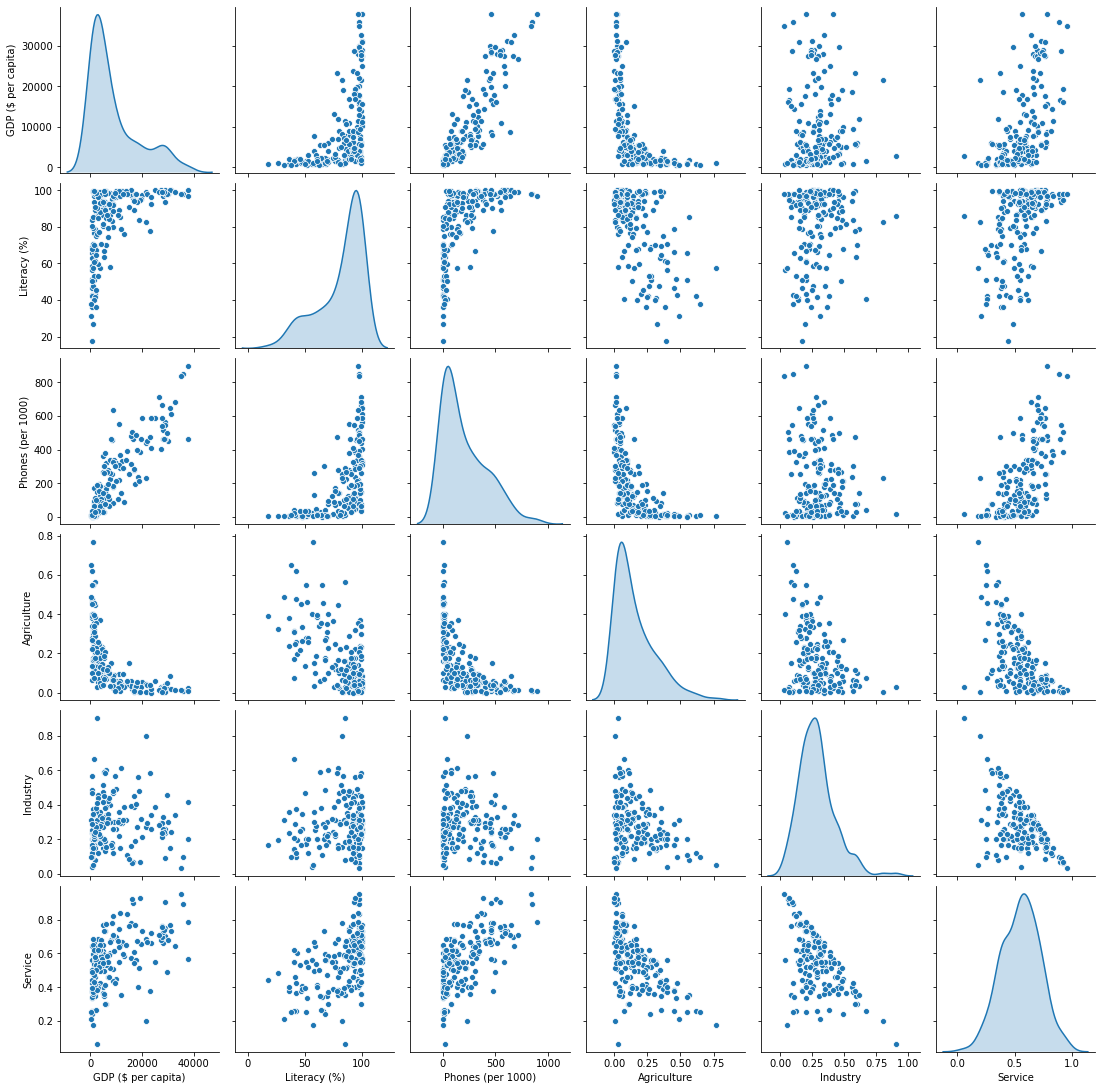

In [6]:

import seaborn as sns

sns.pairplot(df1, diag_kind='kde')
#vemos rel directa entre anchura y long petalo

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

### Normalización de datos
Como hemos estudiado, la escala de las variables afecta a la forma de las regiones de Vornoi que se obtienen en el algoritmo de las k-medias. Por ello, conviene hacer un preprocesamiento de los datos y las técnicas más extendidas son la normalización y la estandarización de los datos. Su uso depende del problema pero generalmente, según hemos visto:

-Si la distribución original es normal reescalaremos y en otro caso normalizaremos los datos.

En nuestro caso, tenemos variables que pueden tomar valores mucho más grandes que otras por lo tanto, será necesario que normalicemos los datos. Sino, unas variables tendrán mucho más peso a la hora de calcular distancias entre puntos que otras y eso afectará significativamente a la división en cluster que realizará el algoritmo.

In [7]:

# acceder al array (numpy) de datos del dataframe
valores = df1.values

from sklearn.preprocessing import MinMaxScaler


# MinMaxScaler escala los datos al intervalo [0-1] sin modificar su distribución
scaler = MinMaxScaler()
scaler.fit(valores)
S2_scaled = scaler.transform(valores)

df_esc = pd.DataFrame(data = S2_scaled, index = df1.index, columns = df1.columns)
df_esc



,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
Country,,,,,,
Afghanistan,0.005362,0.223301,0.003342,0.494148,0.237986,0.356502
Albania,0.107239,0.836165,0.079082,0.301691,0.178490,0.579596
Algeria,0.147453,0.635922,0.086768,0.131339,0.649886,0.264574
Anguilla,0.217158,0.939320,0.512141,0.052016,0.169336,0.804933
Antigua & Barbuda,0.281501,0.866505,0.612274,0.049415,0.215103,0.763453
...,...,...,...,...,...,...
Venezuela,0.115282,0.919903,0.155825,0.052016,0.442792,0.536996
Vietnam,0.053619,0.882282,0.208844,0.271782,0.432494,0.357623
Yemen,0.008043,0.395631,0.041212,0.175553,0.503432,0.371076


## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [8]:
RANDOM_STATE=333
#si usan random state debo fijarlo para q sea repr

In [9]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans


#k means recibe como parámetro el num de clusters que quiero, 

K_MAX = 10

score = np.zeros(K_MAX-2)
davies_boulding = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)

for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE) #lanzo kmeans con valores del 2 al 7, entreno y almaceno puntuaciones del indice que quiero consultar
    
    km.fit(valores)
    
    score[k-2] = -1 * km.score(valores)
    davies_boulding[k-2] = davies_bouldin_score(valores, km.labels_)
    silhouette[k-2] = silhouette_score(valores, km.labels_)

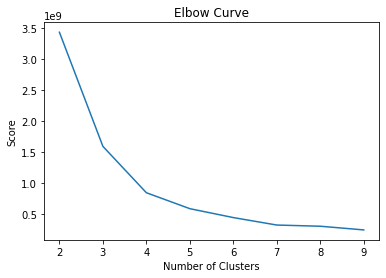

In [10]:
import matplotlib.pyplot as plt


# diagrama del codo
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
#aqui es visual seleccionar num de clusters: 3 o 4

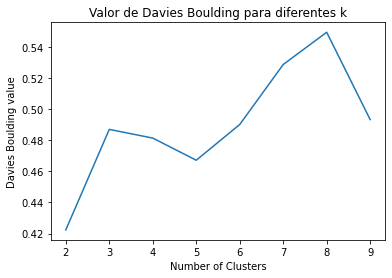

In [11]:
# davies boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()
#me quedo el mas pequeño posible, el 2

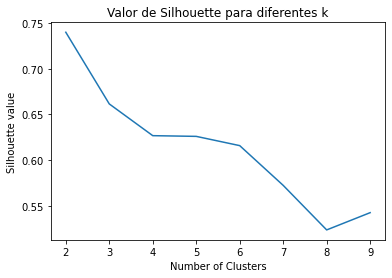

In [12]:
# silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()
#me quedo el valor mas alto, el 2

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

En primer lugar, podemos visualizar los centroides de cada uno de los clusters, que es valor que toman las variables en el individuos prototitpo. 

In [13]:
km = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)
km.fit(df_esc)

centers = km.cluster_centers_
centers

array([[0.6325067 , 0.96256068, 0.59030129, 0.03569571, 0.24439359,
        0.74515135],
       [0.16149901, 0.87767782, 0.1843625 , 0.15511393, 0.34652025,
        0.54128485],
       [0.02629628, 0.4367641 , 0.0188783 , 0.44307335, 0.22936852,
        0.40912127]])

In [14]:
#Las etiquetas de clusters las asignamos al conjunto de datos inicial
df1['Cluster']=km.labels_
df1

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,Cluster
Country,,,,,,,
Afghanistan,700.0,36.0,3.2,0.380,0.240,0.380,2
Albania,4500.0,86.5,71.2,0.232,0.188,0.579,1
Algeria,6000.0,70.0,78.1,0.101,0.600,0.298,1
Anguilla,8600.0,95.0,460.0,0.040,0.180,0.780,0
Antigua & Barbuda,11000.0,89.0,549.9,0.038,0.220,0.743,0
...,...,...,...,...,...,...,...
Venezuela,4800.0,93.4,140.1,0.040,0.419,0.541,1
Vietnam,2500.0,90.3,187.7,0.209,0.410,0.381,1
Yemen,800.0,50.2,37.2,0.135,0.472,0.393,2


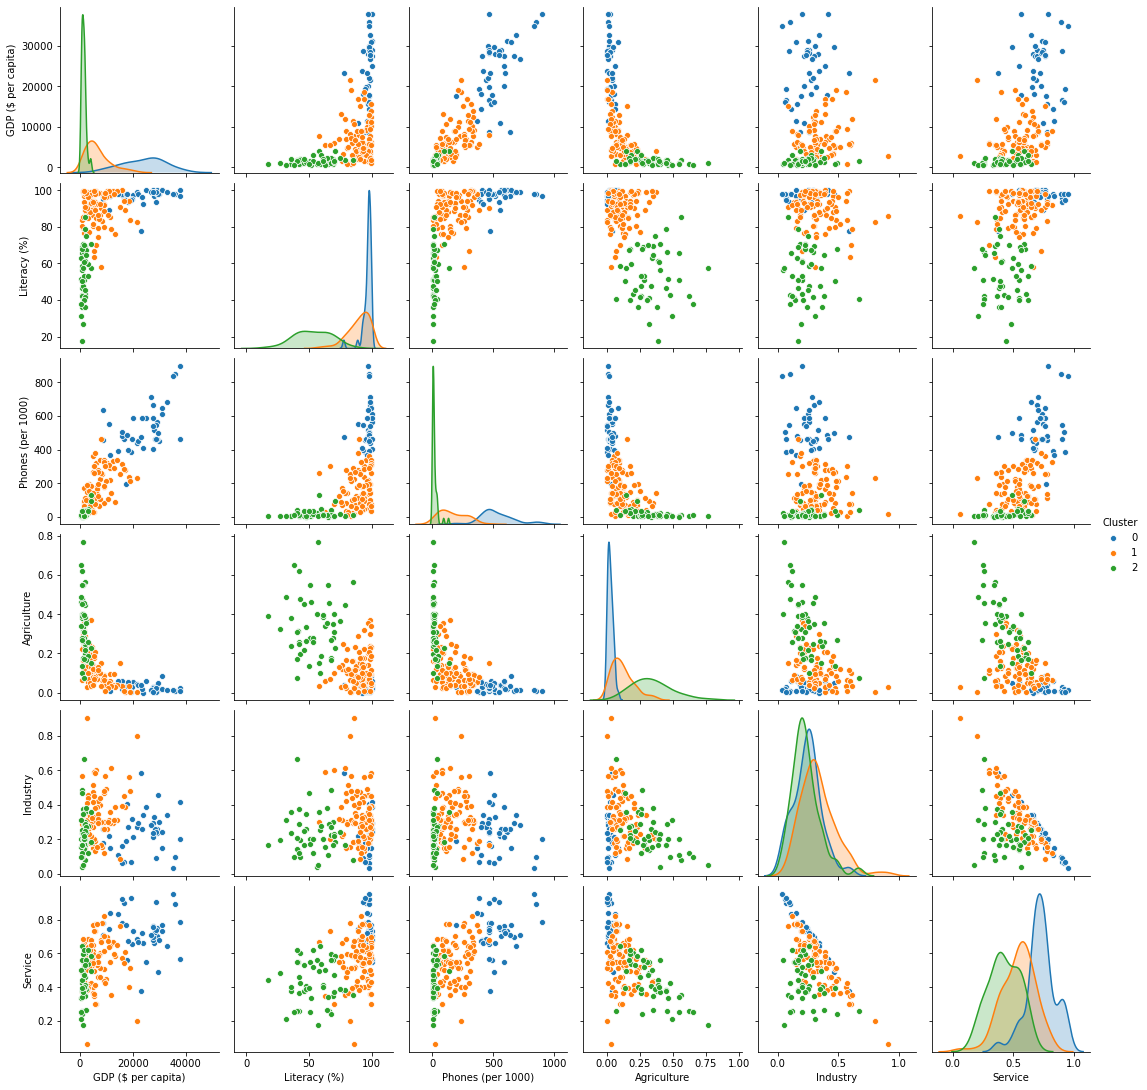

In [15]:
sns.pairplot(df1, diag_kind='kde', hue='Cluster')
# la diagonal es la densidad(eje vertical si hay mucha gente que tiene poca renta .
#me dice cuantos puntos hay en cada 
#me aparecera un trocito pequeño con un ppico grande (lo de verde))



### Conclusiones###
Mirando la gráfica podemos observar que hay 3 grupos de países muy diferenciados por su producto interior bruto. Si nos fijamos en la gráfica de densidad de esta variable podemos observar que hay tres grupos de países bien diferenciados. El primero de ellos, en verde, contiene a los países cuya población tiene un producto interior bruto bajo.Este grupo, es el que contiene además al mayor número de países como podemos ver por la acentuación de su gráfica. El segundo grupo, en naranja, son los países en cuyo producto interior bruto se aprecia un aumento considerable respecto a los del grupo verde pero de manera más suavizada. Hay países con un GDP muy bajo y otros con GDP muy alto pero la mayoría presenta un PIB intermedio. Por último, el grupo azul representa aquellos países cuyo GDP en general es alto. Es una curva mucho más suavizada si nos fijamos. Lo que significa que también incluye países con GDP bajo e intermedio, pero la mayoría (el pico máximo ) se encuentra en la zona de GDP alto. 



Podemos usar estadísticos descriptivos según la segmenatción de los individuos según el cluster al que pertenecen

In [16]:
#MOSTRAMOS LA MATRIZ TRASPUESTA
df1.groupby(["Cluster"]).describe().transpose()

Cluster                              0             1            2
GDP ($ per capita) count     40.000000     92.000000    47.000000
                   mean   24092.500000   6523.913043  1480.851064
                   std     7732.893030   4524.690981   816.311508
                   min     8600.000000    700.000000   500.000000
                   25%    17950.000000   3275.000000   800.000000
                   50%    25900.000000   5450.000000  1300.000000
                   75%    29025.000000   9000.000000  1850.000000
                   max    37800.000000  21500.000000  4100.000000
Literacy (%)       count     40.000000     92.000000    47.000000
                   mean      96.915000     89.920652    53.589362
                   std        3.872821      8.884504    14.501683
                   min       77.900000     58.000000    17.600000
                   25%       96.550000     85.025000    42.300000
                   50%       97.950000     92.250000    52.900000
                   75%       99.000000     97.350000    65.950000
                   max      100.000000     99.900000    85.300000
Phones (per 1000)  count     40.000000     92.000000    47.000000
                   mean     530.172500    165.720652    17.148936
                   std      138.167347    107.955035    23.621378
                   min      194.500000      3.700000     0.200000
                   25%      458.375000     75.075000     3.600000
                   50%      493.300000    141.500000     9.700000
                   75%      590.025000    260.525000    19.550000
                   max      898.000000    463.800000   131.800000
Agriculture        count     40.000000     92.000000    47.000000
                   mean       0.027450      0.119283     0.340723
                   std        0.019916      0.084219     0.149452
                   min        0.000000      0.002000     0.073000
                   25%        0.010750      0.058000     0.243500
                   50%        0.021500      0.099500     0.322000
                   75%        0.040000      0.164000     0.424500
                   max        0.086000      0.370000     0.769000
Industry           count     40.000000     92.000000    47.000000
                   mean       0.245600      0.334859     0.232468
                   std        0.115622      0.145356     0.118078
                   min        0.032000      0.088000     0.040000
                   25%        0.175000      0.229750     0.167500
                   50%        0.252000      0.311000     0.204000
                   75%        0.298000      0.412250     0.281500
                   max        0.585000      0.906000     0.666000
Service            count     40.000000     92.000000    47.000000
                   mean       0.726675      0.544826     0.426936
                   std        0.119561      0.134877     0.124527
                   min        0.375000      0.062000     0.177000
                   25%        0.671000      0.445000     0.351500
                   50%        0.729000      0.551500     0.406000
                   75%        0.780000      0.640750     0.542000
                   max        0.954000      0.818000     0.643000

En esta tabla podemos observar la descripción de los estadísticos y ver valores como la media de PIB en cada cluster, o la media de la tasa de alfabetización que como vemos es mayor en los países del cluster 0, que son los más ricos

### Distribución de cada variable por Cluster###
Ahora visualizaremos la distribución de cada una de las variables por cluster

Service                                                           
          count      mean       std    min     25%     50%      75%    max
Cluster                                                                   
0          40.0  0.726675  0.119561  0.375  0.6710  0.7290  0.78000  0.954
1          92.0  0.544826  0.134877  0.062  0.4450  0.5515  0.64075  0.818
2          47.0  0.426936  0.124527  0.177  0.3515  0.4060  0.54200  0.643

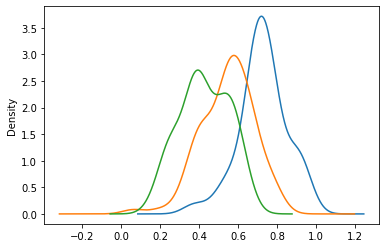

In [32]:
df1.groupby(["Cluster"])["Service"].plot.density()
df1.loc[:,["Service", 'Cluster']].groupby(["Cluster"]).describe()

Phones (per 1000)                                                 \
                    count        mean         std    min      25%    50%   
Cluster                                                                    
0                    40.0  530.172500  138.167347  194.5  458.375  493.3   
1                    92.0  165.720652  107.955035    3.7   75.075  141.5   
2                    47.0   17.148936   23.621378    0.2    3.600    9.7   

                         
             75%    max  
Cluster                  
0        590.025  898.0  
1        260.525  463.8  
2         19.550  131.8

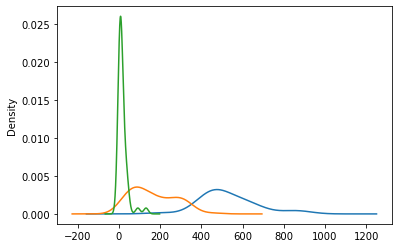

In [31]:
df1.groupby(["Cluster"])["Phones (per 1000)"].plot.density()
df1.loc[:,["Phones (per 1000)", 'Cluster']].groupby(["Cluster"]).describe()

En este caso, por ejemplo, podemos observar como en los países pobres (cluster verde)la mayor parte de la población no posee teléfonos móviles. Mientras que en los países más desarrollados (cluster azul) la norma es que casi toda la población lo tenga.

Literacy (%)                                                         
               count       mean        std   min     25%    50%    75%    max
Cluster                                                                      
0               40.0  96.915000   3.872821  77.9  96.550  97.95  99.00  100.0
1               92.0  89.920652   8.884504  58.0  85.025  92.25  97.35   99.9
2               47.0  53.589362  14.501683  17.6  42.300  52.90  65.95   85.3

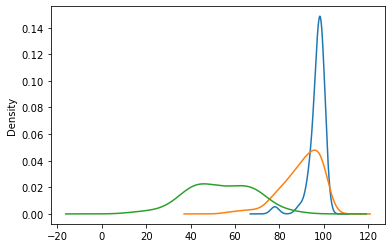

In [30]:
df1.groupby(["Cluster"])["Literacy (%)"].plot.density()
df1.loc[:,["Literacy (%)", 'Cluster']].groupby(["Cluster"]).describe()

Industry                                                           
           count      mean       std    min      25%    50%      75%    max
Cluster                                                                    
0           40.0  0.245600  0.115622  0.032  0.17500  0.252  0.29800  0.585
1           92.0  0.334859  0.145356  0.088  0.22975  0.311  0.41225  0.906
2           47.0  0.232468  0.118078  0.040  0.16750  0.204  0.28150  0.666

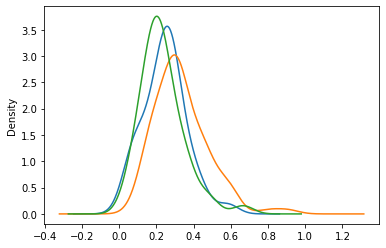

In [29]:
df1.groupby(["Cluster"])["Industry"].plot.density()
df1.loc[:,["Industry", 'Cluster']].groupby(["Cluster"]).describe()

Agriculture                                                           
              count      mean       std    min      25%     50%     75%    max
Cluster                                                                       
0              40.0  0.027450  0.019916  0.000  0.01075  0.0215  0.0400  0.086
1              92.0  0.119283  0.084219  0.002  0.05800  0.0995  0.1640  0.370
2              47.0  0.340723  0.149452  0.073  0.24350  0.3220  0.4245  0.769

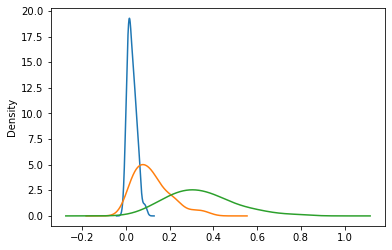

In [28]:
df1.groupby(["Cluster"])["Agriculture"].plot.density()
df1.loc[:,["Agriculture", 'Cluster']].groupby(["Cluster"]).describe()

GDP ($ per capita)                                              \
                     count          mean          std     min      25%   
Cluster                                                                  
0                     40.0  24092.500000  7732.893030  8600.0  17950.0   
1                     92.0   6523.913043  4524.690981   700.0   3275.0   
2                     47.0   1480.851064   816.311508   500.0    800.0   

                                    
             50%      75%      max  
Cluster                             
0        25900.0  29025.0  37800.0  
1         5450.0   9000.0  21500.0  
2         1300.0   1850.0   4100.0

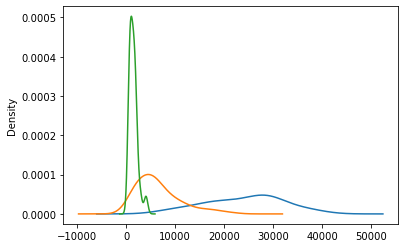

In [27]:
df1.groupby(["Cluster"])["GDP ($ per capita)"].plot.density()
df1.loc[:,["GDP ($ per capita)", 'Cluster']].groupby(["Cluster"]).describe()
